In [41]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import spectral_derivative as sd 


## Check truncation errors of finite difference stencils

### We see that the higher-order stencils become unstable for high resolutions

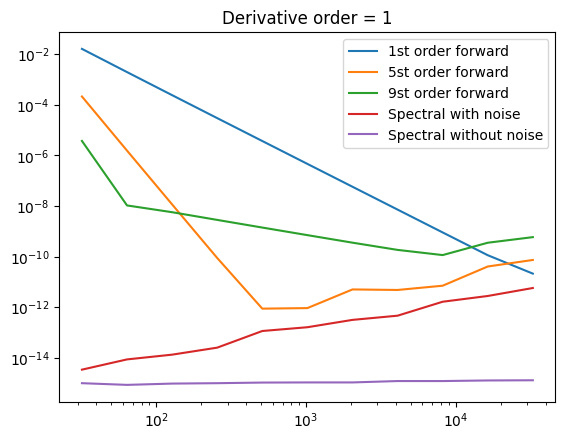

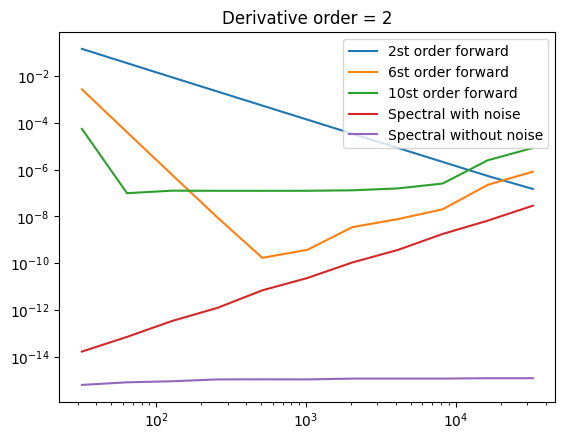

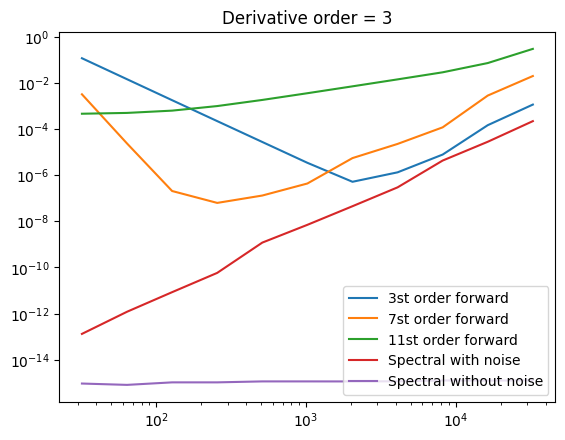

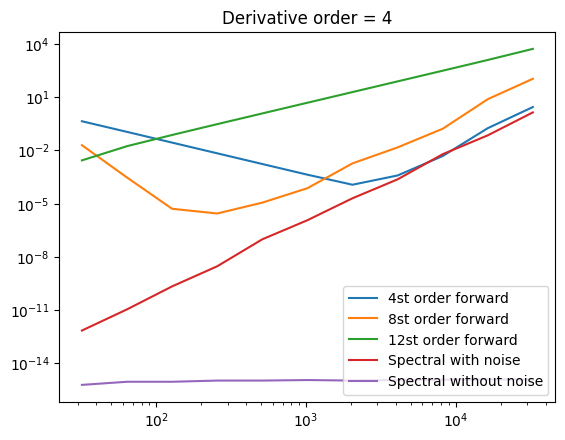

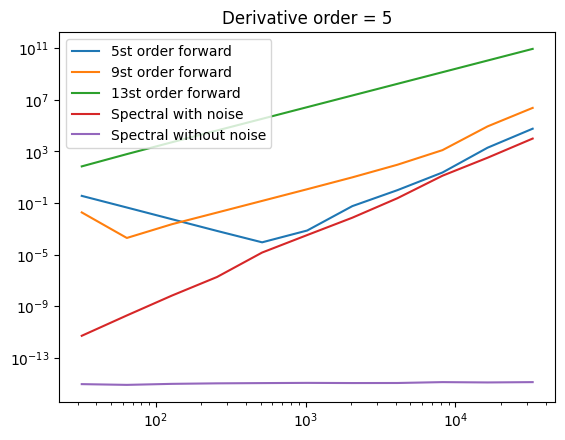

In [49]:


def cosine(x, derivative_order): 
    k = 4*np.pi 
    return np.real((1j * k)**derivative_order * np.exp(1j * k * x))

max_derivative_order = 5
max_accuracy_order   = 10
d_accuracy_order     = 4

for derivative_order in range(max_derivative_order):
    plt.title(f"Derivative order = {derivative_order + 1}")
    resolutions = 2**np.arange(5, 16)
    
    for accuracy_order in range(derivative_order, derivative_order + max_accuracy_order, d_accuracy_order):
        #Use finite differences
        even_order = (accuracy_order+1) + ((accuracy_order+1) % 2 != 0)
        for direction in range(1):
            errors = []
            for resolution in resolutions: 
                x, dx = sd.computeX(0, 1, resolution)
                x = x[:-1] #chop off last point for periodic BC
                f    = cosine(x, 0)
                dnum = sd.getDerivative(f, dx, sd.stencils[direction][even_order][derivative_order], derivative_order+1)
                dana = cosine(x, derivative_order + 1)
                errors.append(np.max(np.abs(dnum - dana))/np.max(np.abs(dana)))


            plt.loglog(resolutions, errors, label=f"{accuracy_order + 1}st order {sd.stencil_names[direction]}")

    #Spectral method for comparison 
    errors = []
    for resolution in resolutions: 
        x, dx = sd.computeX(0, 1, resolution + 1)
        x = x[:-1] #chop off last point for periodic BC
        f    = cosine(x, 0)
        k    = sd.computeK(f, dx, sd.PERIODIC)
        fhat = scipy.fft.fft(f)
        dnum = scipy.fft.ifft(fhat * (1j * k) ** (derivative_order + 1)).real
        dana = cosine(x, derivative_order + 1)
        errors.append(np.max(np.abs(dnum - dana))/np.max(np.abs(dana)))


    plt.loglog(resolutions, errors, label=f"Spectral with noise")

    errors = []
    for resolution in resolutions: 
        x, dx = sd.computeX(0, 1, resolution + 1)
        x = x[:-1] #chop off last point for periodic BC
        f    = cosine(x, 0)
        k    = sd.computeK(f, dx, sd.PERIODIC)
        fhat = scipy.fft.fft(f)
        fhat[fhat < 1e-10] = 0
        dnum = scipy.fft.ifft(fhat * (1j * k) ** (derivative_order + 1)).real
        dana = cosine(x, derivative_order + 1)
        errors.append(np.max(np.abs(dnum - dana))/np.max(np.abs(dana)))


    plt.loglog(resolutions, errors, label=f"Spectral without noise")


    plt.legend()
    plt.show()


